<a href="https://colab.research.google.com/github/pingisu/AI4CCEE_Fall_2024/blob/main/mini_project/MiniProject_1/Submission/Final_version_mini_project_Ping_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Use OpenStreetMap to identify multilane arterial roads in Iowa, and show the iowa multilane arterial roads picture

!pip install osmnx geopandas matplotlib

import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure the plot style
plt.style.use('ggplot')

# Define the area of interest (Iowa)
place_name = "Iowa, USA"

# Download the street network data from OpenStreetMap
graph = ox.graph_from_place(place_name, network_type="drive")

# Convert the graph to a GeoDataFrame
nodes, edges = ox.graph_to_gdfs(graph)

# Filter for multilane arterial roads
multilane_arterial = edges[edges["highway"].isin(["primary", "secondary", "tertiary"])]

# Plot the multilane arterial roads
fig, ax = plt.subplots(figsize=(12, 8))
multilane_arterial.plot(ax=ax, linewidth=1, color="blue", alpha=0.7)

# Add labels and title
ax.set_title("Multilane Arterial Roads in Iowa")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Remove axes
ax.axis("off")

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 63 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 

In [ ]:
# prompt: import crash data '/content/updated_data_1.csv', focusing on input columns 'LATITUDE' and 'LONGITUD' and output column 'FATALS'.

import pandas as pd

# Load the crash data
crash_data = pd.read_csv('/content/updated_data_1.csv')

# Select the relevant columns
crash_data = crash_data[['LATITUDE', 'LONGITUD', 'FATALS']]

# Print some info
print(crash_data.head())
print(crash_data.info())


    LATITUDE   LONGITUD  FATALS
0  42.449197 -93.860783       1
1  41.330281 -94.035986       1
2  40.686994 -95.588881       1
3  41.663308 -91.295342       1
4  40.711489 -94.346800       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LATITUDE  1570 non-null   float64
 1   LONGITUD  1570 non-null   float64
 2   FATALS    1570 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 36.9 KB
None


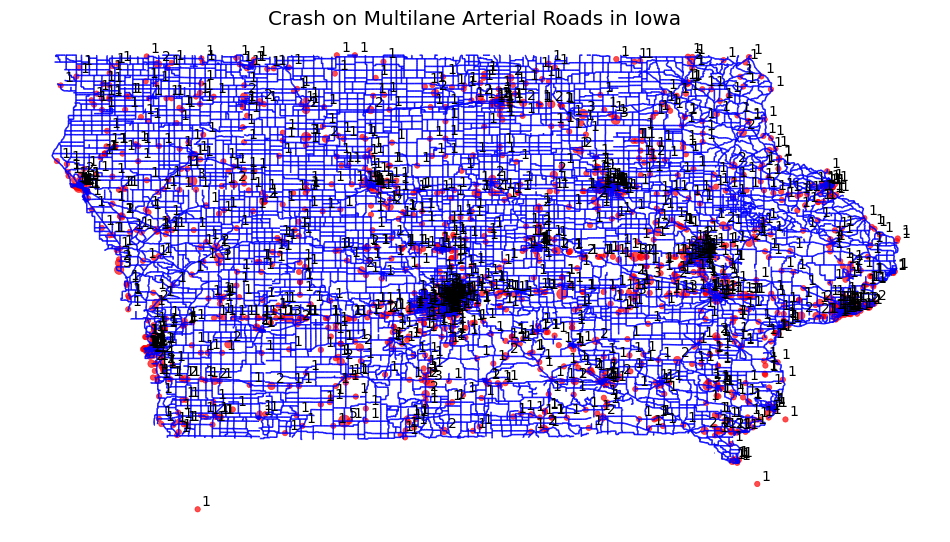

In [ ]:
# prompt: import crash data '/content/updated_data_1.csv', focusing on input columns 'LATITUDE' and 'LONGITUD' and output column 'FATALS'. generate hotspots using red points based on multilane arterial roads in Iowa graph with the number of FATALS on each point  (no dicimal), with corresponding spot size

# Convert the crash data to a GeoDataFrame
crash_gdf = gpd.GeoDataFrame(
    crash_data, geometry=gpd.points_from_xy(crash_data.LONGITUD, crash_data.LATITUDE)
)

# Plot the hotspots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot multilane arterial roads
multilane_arterial.plot(ax=ax, linewidth=1, color="blue", alpha=0.7)

# Plot crash hotspots
crash_gdf.plot(
    ax=ax,
    markersize=crash_gdf["FATALS"] * 15,  # Adjust the size based on the number of fatalities
    color="red",
    alpha=0.7,
)

# Annotate the number of fatalities on each hotspot
for x, y, label in zip(
    crash_gdf.geometry.x, crash_gdf.geometry.y, crash_gdf["FATALS"].astype(int)
):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

# Add labels and title
ax.set_title("Crash on Multilane Arterial Roads in Iowa")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Remove axes
ax.axis("off")

# Display the plot
plt.show()

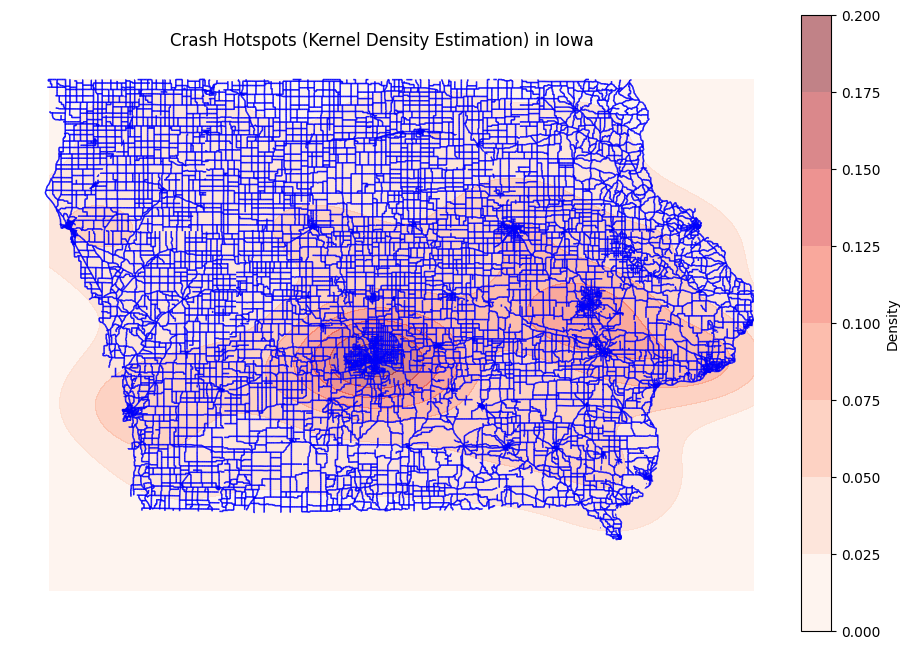

In [ ]:
# prompt: focusing on input columns 'LATITUDE' and 'LONGITUD' and output column 'FATALS' from ''/content/updated_data_1.csv''. Apply spatial analysis techniques kernel density estimation to identify hotspots

# Load the crash data
crash_data = pd.read_csv('/content/updated_data_1.csv')

# Select the relevant columns
crash_data = crash_data[['LATITUDE', 'LONGITUD', 'FATALS']]

# Convert the crash data to a GeoDataFrame
crash_gdf = gpd.GeoDataFrame(
    crash_data, geometry=gpd.points_from_xy(crash_data.LONGITUD, crash_data.LATITUDE)
)

# Extract coordinates for KDE analysis
coordinates = crash_gdf[['LONGITUD', 'LATITUDE']].values

# Perform Kernel Density Estimation (KDE)
kde = gaussian_kde(coordinates.T)

# Create a grid for the KDE plot
x_range = crash_gdf.LONGITUD.min(), crash_gdf.LONGITUD.max()
y_range = crash_gdf.LATITUDE.min(), crash_gdf.LATITUDE.max()
x, y = np.mgrid[x_range[0]:x_range[1]:100j, y_range[0]:y_range[1]:100j]
positions = np.vstack([x.ravel(), y.ravel()])
density = kde(positions)

# Reshape the density values
density = np.reshape(density, x.shape)

# Plot the KDE results
fig, ax = plt.subplots(figsize=(12, 8))
multilane_arterial.plot(ax=ax, linewidth=1, color="blue", alpha=0.7)
contour = ax.contourf(x, y, density, cmap='Reds', alpha=0.5)

# Add labels and title
ax.set_title("Crash Hotspots (Kernel Density Estimation) in Iowa")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.axis("off")

# Display the plot
plt.colorbar(contour, ax=ax, label='Density')
plt.show()

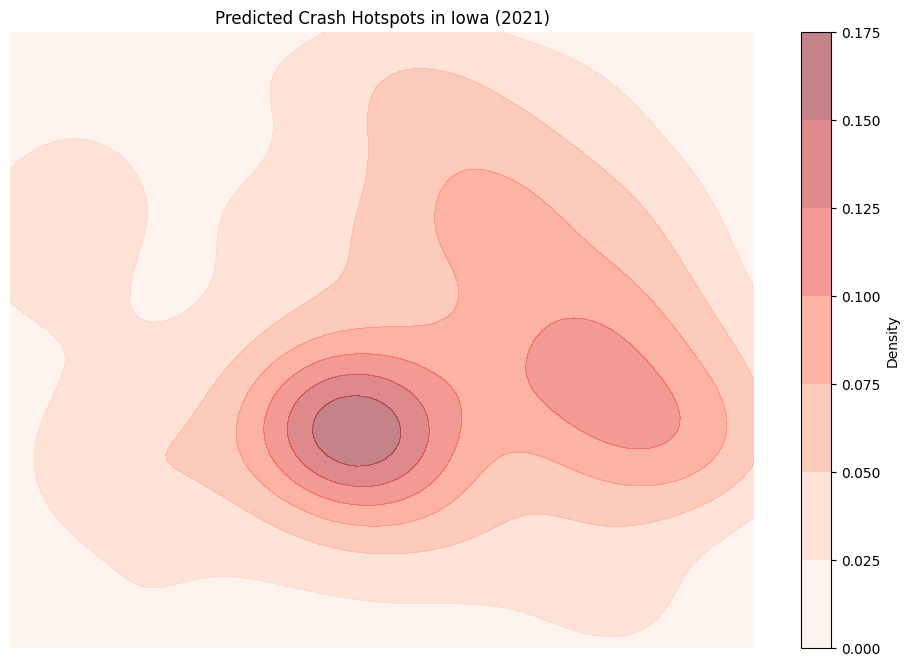

In [ ]:
# prompt: Develop a predictive model for crash likelihood on these roads, and predict year 2021 where is the hotspots, and show the prediction Crash Hotspots in Iowa graph based on '/content/2021.xlsx' columns 'LONGITUD' and 'LATITUDE'

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# Load the crash data for 2021
crash_data_2021 = pd.read_excel('/content/2021.xlsx')

# Assuming 'LONGITUD' and 'LATITUDE' are the columns containing coordinates
crash_data_2021 = crash_data_2021[['LONGITUD', 'LATITUDE']]

# Convert the crash data to a GeoDataFrame
crash_gdf_2021 = gpd.GeoDataFrame(
    crash_data_2021,
    geometry=gpd.points_from_xy(crash_data_2021.LONGITUD, crash_data_2021.LATITUDE)
)

# Extract coordinates for KDE analysis
coordinates_2021 = crash_gdf_2021[['LONGITUD', 'LATITUDE']].values

# Perform Kernel Density Estimation (KDE) for 2021
kde_2021 = gaussian_kde(coordinates_2021.T)

# Create a grid for the KDE plot
x_range_2021 = crash_gdf_2021.LONGITUD.min(), crash_gdf_2021.LONGITUD.max()
y_range_2021 = crash_gdf_2021.LATITUDE.min(), crash_gdf_2021.LATITUDE.max()
x_2021, y_2021 = np.mgrid[x_range_2021[0]:x_range_2021[1]:100j, y_range_2021[0]:y_range_2021[1]:100j]
positions_2021 = np.vstack([x_2021.ravel(), y_2021.ravel()])
density_2021 = kde_2021(positions_2021)

# Reshape the density values
density_2021 = np.reshape(density_2021, x_2021.shape)

# Plot the KDE results for 2021
fig, ax = plt.subplots(figsize=(12, 8))
contour_2021 = ax.contourf(x_2021, y_2021, density_2021, cmap='Reds', alpha=0.5)

# Add labels and title
ax.set_title("Predicted Crash Hotspots in Iowa (2021)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.axis("off")

# Display the plot
plt.colorbar(contour_2021, ax=ax, label='Density')
plt.show()

/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 63 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


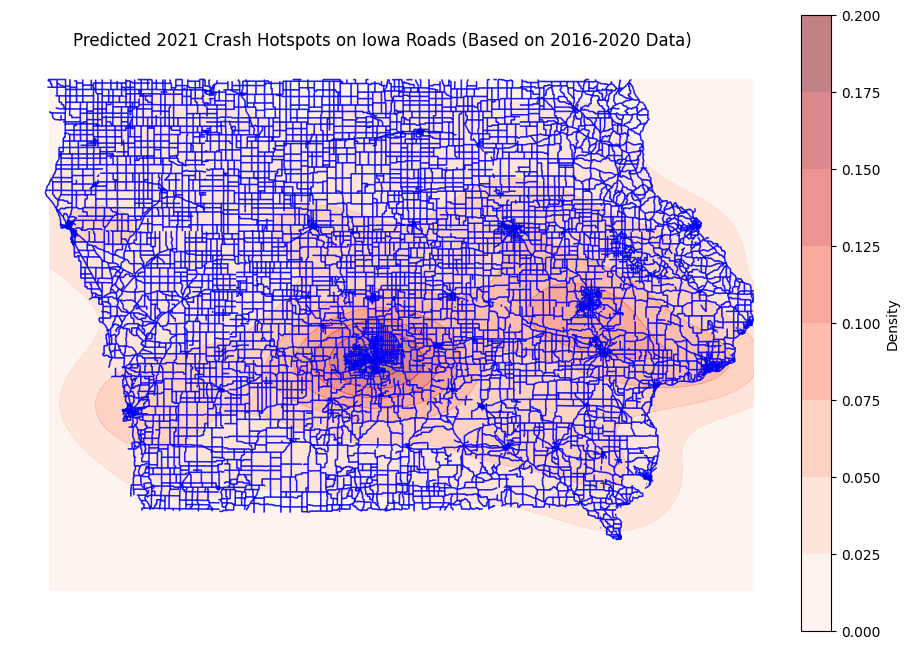

In [ ]:
# prompt: Develop a prediction for crash likelihood hotspots in 2021, use years 2016 to 2020 data from '/content/updated_data_1.csv', and plot the 2021 prediction hotspots graph

# Load the crash data for 2016-2020
crash_data_2016_2020 = pd.read_csv('/content/updated_data_1.csv')
crash_data_2016_2020 = crash_data_2016_2020[['LATITUDE', 'LONGITUD']]

# Convert the crash data to a GeoDataFrame
crash_gdf_2016_2020 = gpd.GeoDataFrame(
    crash_data_2016_2020,
    geometry=gpd.points_from_xy(crash_data_2016_2020.LONGITUD, crash_data_2016_2020.LATITUDE)
)

# Extract coordinates for KDE analysis (2016-2020)
coordinates_2016_2020 = crash_gdf_2016_2020[['LONGITUD', 'LATITUDE']].values

# Perform Kernel Density Estimation (KDE) for 2016-2020
kde_2016_2020 = gaussian_kde(coordinates_2016_2020.T)

# Create a grid for the KDE plot
x_range_2016_2020 = crash_gdf_2016_2020.LONGITUD.min(), crash_gdf_2016_2020.LONGITUD.max()
y_range_2016_2020 = crash_gdf_2016_2020.LATITUDE.min(), crash_gdf_2016_2020.LATITUDE.max()
x_2016_2020, y_2016_2020 = np.mgrid[x_range_2016_2020[0]:x_range_2016_2020[1]:100j, y_range_2016_2020[0]:y_range_2016_2020[1]:100j]
positions_2016_2020 = np.vstack([x_2016_2020.ravel(), y_2016_2020.ravel()])
density_2016_2020 = kde_2016_2020(positions_2016_2020)

# Reshape the density values
density_2016_2020 = np.reshape(density_2016_2020, x_2016_2020.shape)

# Define the area of interest (Iowa)
place_name = "Iowa, USA"

# Download the street network data from OpenStreetMap
graph = ox.graph_from_place(place_name, network_type="drive")

# Convert the graph to a GeoDataFrame
nodes, edges = ox.graph_to_gdfs(graph)

# Filter for multilane arterial roads
multilane_arterial = edges[edges["highway"].isin(["primary", "secondary", "tertiary"])]

# Plot the KDE results for 2021 on top of the multilane arterial roads
fig, ax = plt.subplots(figsize=(12, 8))
multilane_arterial.plot(ax=ax, linewidth=1, color="blue", alpha=0.7)  # Existing roads layer
contour_2016_2020 = ax.contourf(x_2016_2020, y_2016_2020, density_2016_2020, cmap='Reds', alpha=0.5)

# Add labels and title
ax.set_title("Predicted 2021 Crash Hotspots on Iowa Roads (Based on 2016-2020 Data)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.axis("off")

# Display the plot
plt.colorbar(contour_2016_2020, ax=ax, label='Density')
plt.show()

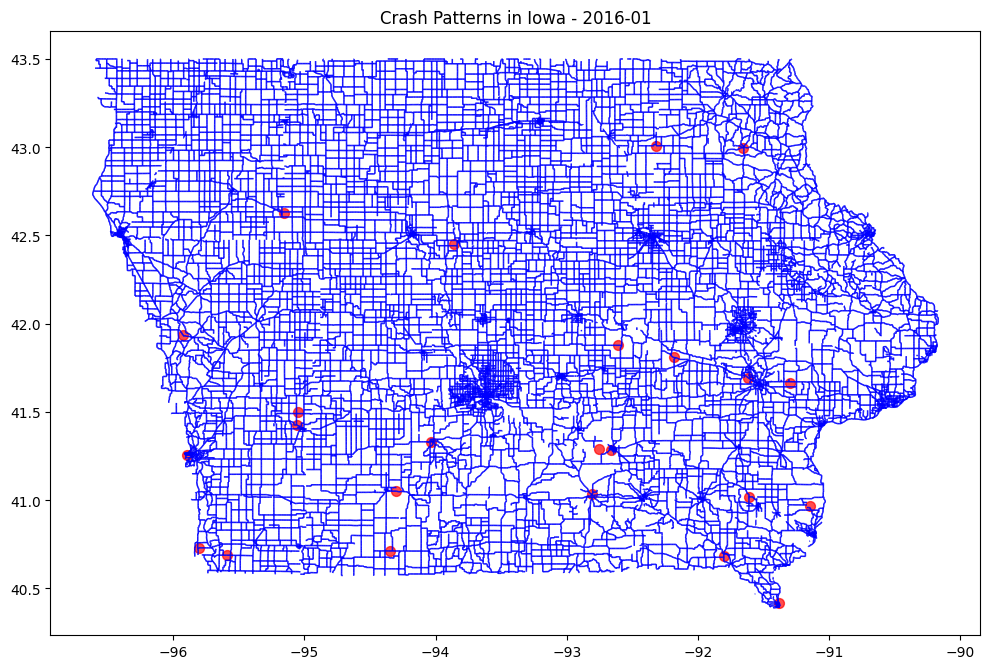

TypeError: Input z must be 2D, not 1D

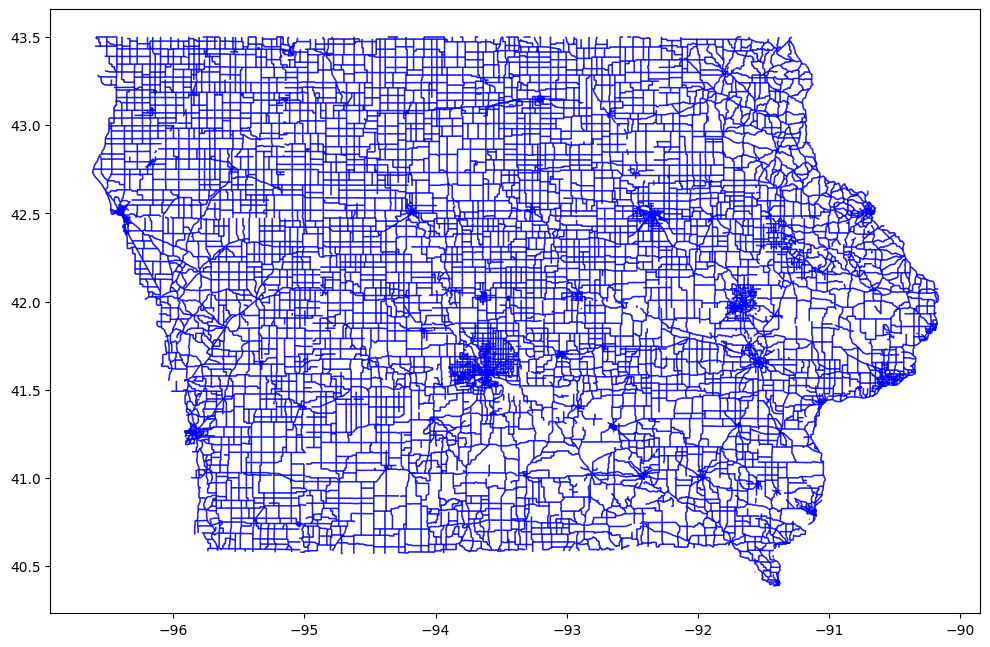

In [ ]:
# prompt: Create visualizations and time-lapse animations of crash patterns, using '/content/updated_data_1.csv' column 'MonthYear'

# ... (Your existing code for loading data, creating multilane_arterial, and performing KDE) ...

# Assuming you have a DataFrame 'crash_data' with 'MonthYear' and other relevant info
import matplotlib.animation as animation

# Group the crash data by month/year
crash_data_by_month = crash_data.groupby('MonthYear')

# Create a figure and axes for the animation
fig, ax = plt.subplots(figsize=(12, 8))

# Plot multilane arterial roads
multilane_arterial.plot(ax=ax, linewidth=1, color="blue", alpha=0.7)

# Initialize an empty scatter plot
scatter = ax.scatter([], [], s=50, c='red', alpha=0.7)

# Function to update the scatter plot for each frame (month/year)
def animate(month_year):
    month_data = crash_data_by_month.get_group(month_year)
    x = month_data['LONGITUD']
    y = month_data['LATITUDE']
    scatter.set_offsets(np.c_[x, y])
    ax.set_title(f"Crash Patterns in Iowa - {month_year}")
    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=crash_data_by_month.groups.keys(), interval=500, blit=True)

# Display the animation
plt.show()

# Save the animation as a GIF (optional)
ani.save('crash_animation.gif', writer='imagemagick', fps=2)

# Example of creating a time-lapse animation of KDE plots
fig, ax = plt.subplots(figsize=(12, 8))
multilane_arterial.plot(ax=ax, linewidth=1, color="blue", alpha=0.7)

# Initialize an empty contour plot
contour = ax.contourf([], [], [], cmap='Reds', alpha=0.5)

def animate_kde(month_year):
    month_data = crash_data_by_month.get_group(month_year)
    coordinates = month_data[['LONGITUD', 'LATITUDE']].values
    kde = gaussian_kde(coordinates.T)

    # ... (Your existing code for creating the grid and density values) ...
    x_range = month_data.LONGITUD.min(), month_data.LONGITUD.max()
    y_range = month_data.LATITUDE.min(), month_data.LATITUDE.max()
    x, y = np.mgrid[x_range[0]:x_range[1]:100j, y_range[0]:y_range[1]:100j]
    positions = np.vstack([x.ravel(), y.ravel()])
    density = kde(positions)

    density = np.reshape(density, x.shape)

    contour = ax.contourf(x, y, density, cmap='Reds', alpha=0.5)
    ax.set_title(f"Crash Hotspots (KDE) in Iowa - {month_year}")
    return contour,

ani_kde = animation.FuncAnimation(fig, animate_kde, frames=crash_data_by_month.groups.keys(), interval=500, blit=True)

plt.show()

ani_kde.save('kde_animation.gif', writer='imagemagick', fps=2)

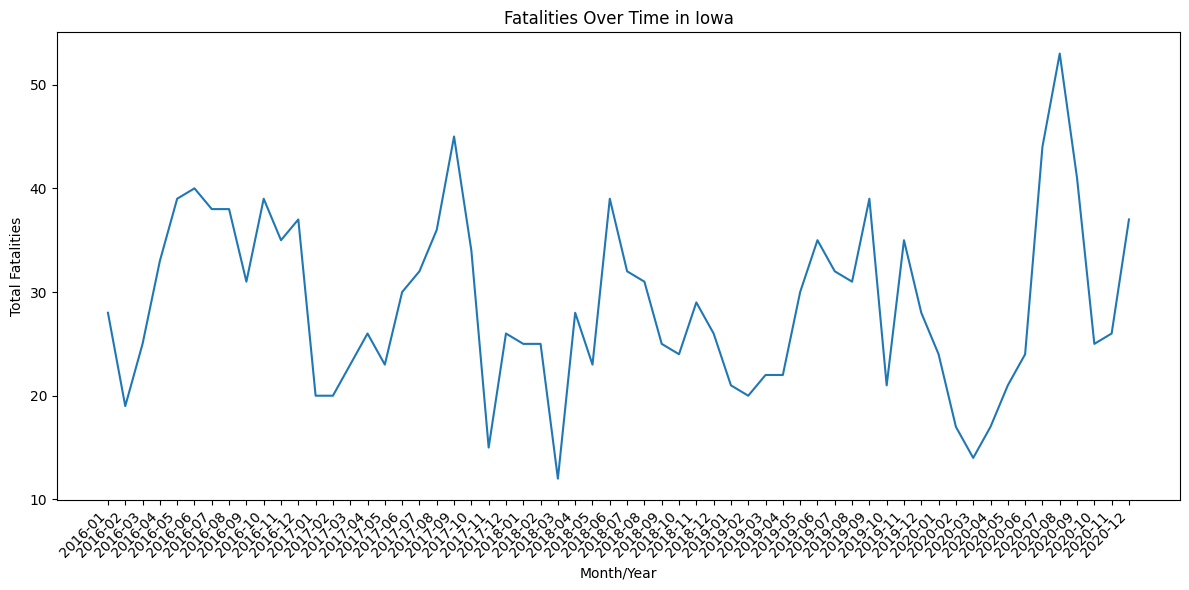

In [ ]:
# prompt: Create visualizations and time-lapse animations of crash patterns, using '/content/updated_data_1.csv' columns 'FATALS' and 'MonthYear', and draw a Line chart

# ... (Your existing code for loading data, creating multilane_arterial, etc.) ...

# Assuming you have a DataFrame 'crash_data' with 'MonthYear' and 'FATALS'

# Group the crash data by month/year and sum fatalities
crash_data_by_month = crash_data.groupby('MonthYear')['FATALS'].sum()

# Create a figure and axes for the line chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the line chart
ax.plot(crash_data_by_month.index, crash_data_by_month.values)

# Add labels and title
ax.set_title('Fatalities Over Time in Iowa')
ax.set_xlabel('Month/Year')
ax.set_ylabel('Total Fatalities')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

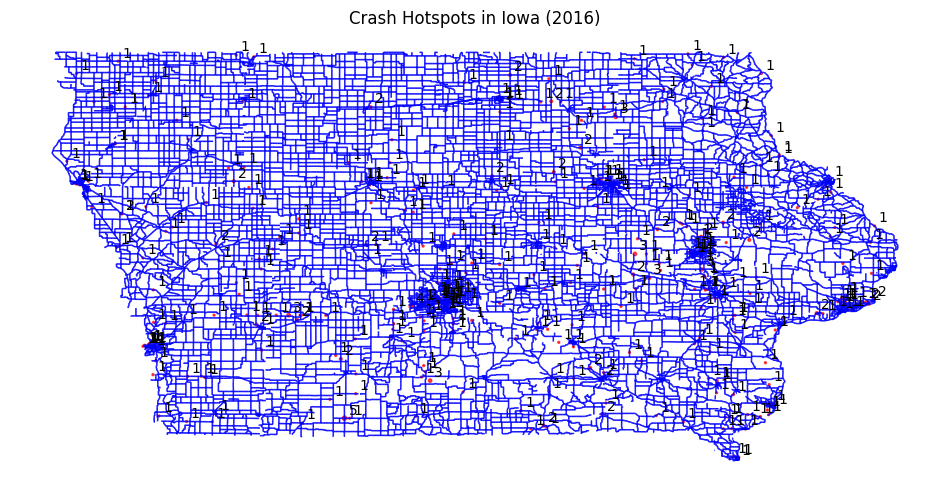

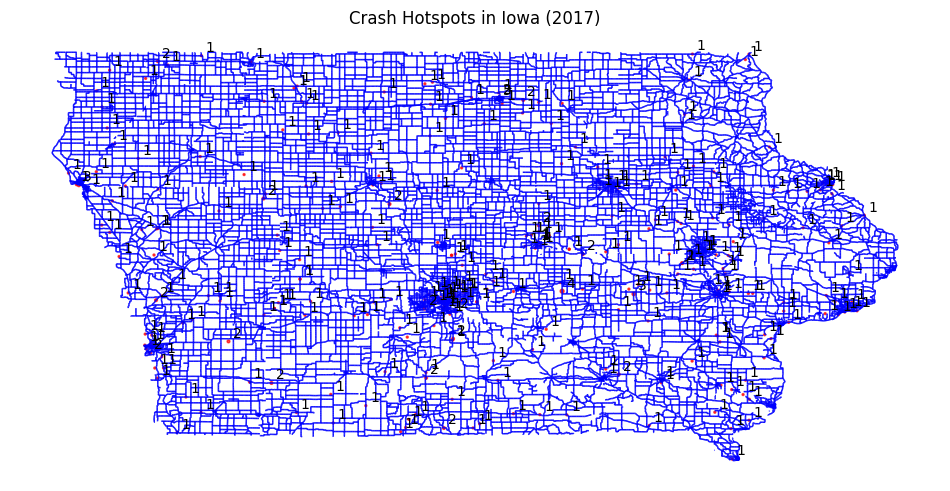

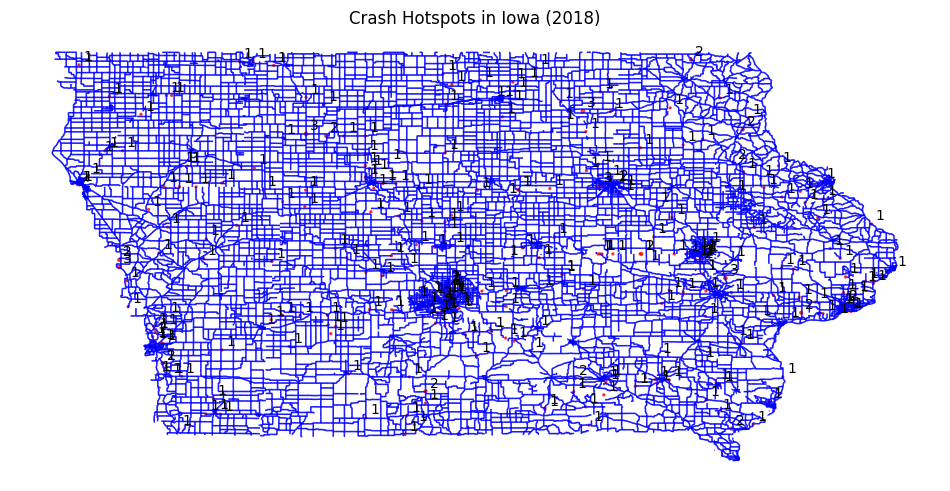

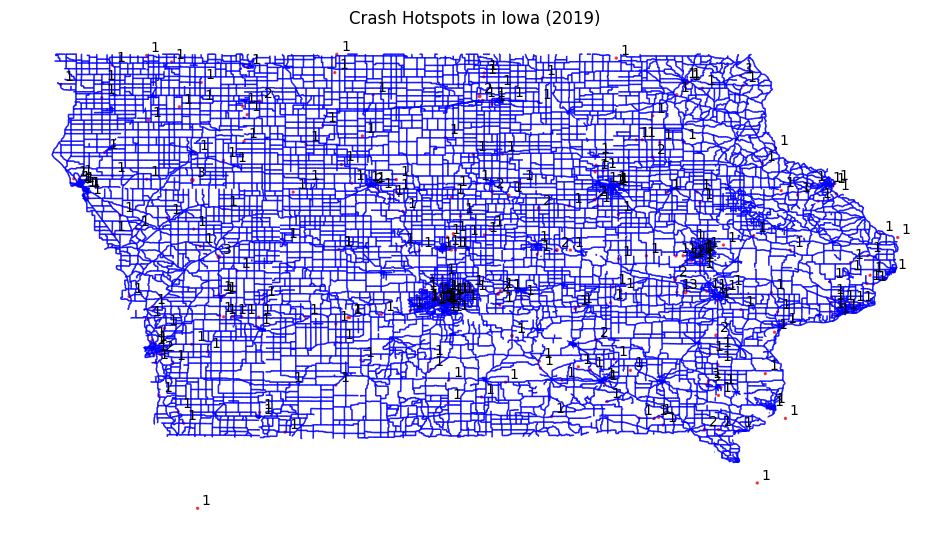

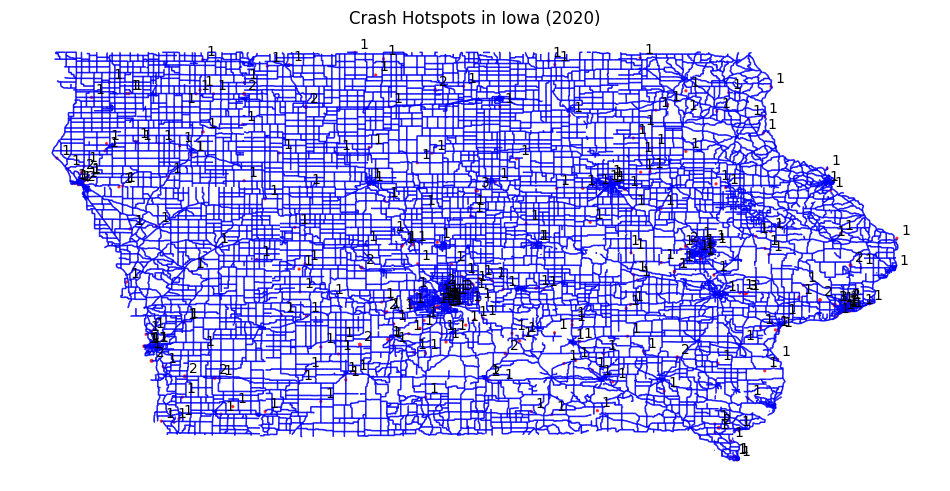

In [ ]:
# prompt: By using data from '/content/updated_data_1.csv', generate hotspots pictures with the number  of FATALS on each point (no dicimal) for year 2016 to 2020, respectively.

# ... (Your existing code for loading data, creating multilane_arterial, etc.) ...

# Function to generate hotspot plot for a given year
def generate_hotspot_plot(year):
  # Filter crash data for the specified year
  crash_data_year = crash_data[crash_data['YEAR'] == year]

  # Convert the crash data for the year to a GeoDataFrame
  crash_gdf_year = gpd.GeoDataFrame(
      crash_data_year,
      geometry=gpd.points_from_xy(crash_data_year.LONGITUD, crash_data_year.LATITUDE)
  )

  # Plot the hotspots for the year
  fig, ax = plt.subplots(figsize=(12, 8))

  # Plot multilane arterial roads
  multilane_arterial.plot(ax=ax, linewidth=1, color="blue", alpha=0.7)

  # Plot crash hotspots for the year
  crash_gdf_year.plot(
      ax=ax,
      markersize=crash_gdf_year["FATALS"] * 2,  # Adjust the size based on the number of fatalities
      color="red",
      alpha=0.7,
  )

  # Annotate the number of fatalities on each hotspot for the year
  for x, y, label in zip(
      crash_gdf_year.geometry.x, crash_gdf_year.geometry.y, crash_gdf_year["FATALS"].astype(int)
  ):
      ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

  # Add labels and title
  ax.set_title(f"Crash Hotspots in Iowa ({year})")
  ax.set_xlabel("Longitude")
  ax.set_ylabel("Latitude")

  # Remove axes
  ax.axis("off")

  # Display the plot
  plt.show()

# Generate hotspot plots for years 2016 to 2020
for year in range(2016, 2021):
  generate_hotspot_plot(year)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    33.42      8.87701e+32       29        0.0911504         0.198413      3.60m
   1    15.52      8.51853e+10       47        0.0902655         0.206349      1.48m
   2     7.36      4.61595e+09        3        0.0876106         0.230159      1.40m
   3     3.52      2.26974e+09        3        0.0893805         0.214286      1.85m
   4     3.33           115858        3        0.0876106         0.230159      1.06m
   5     3.44      2.63599e+10        3        0.0876106         0.230159     59.46s
   6     3.35      5.68093e+06        3        0.0884956         0.222222      2.64m
   7     3.38      9.30485e+07        3        0.0849558         0.253968     51.03s
   8     3.39      5.14082e+11        3        0.0884956         0.222222  

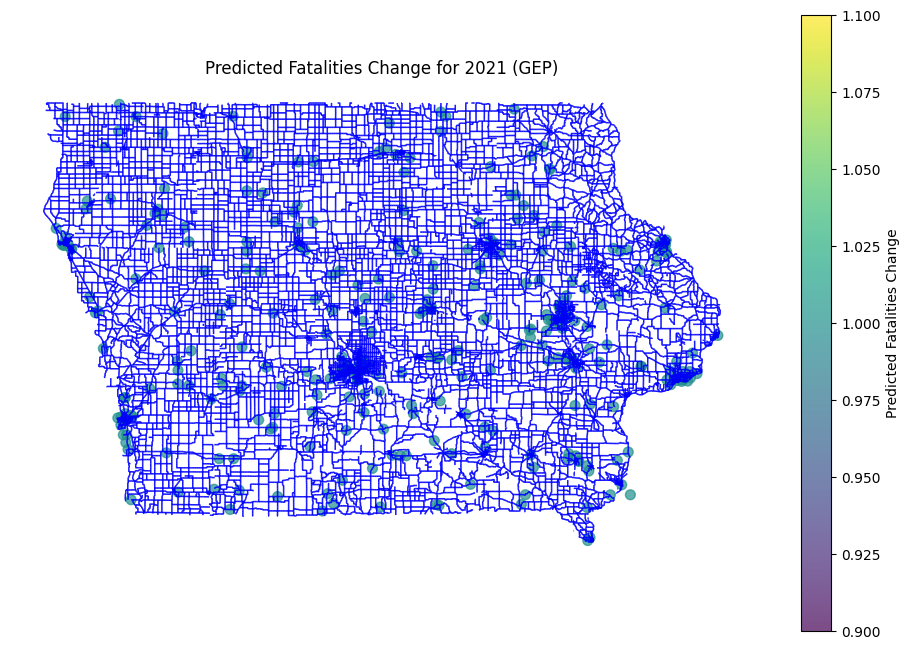

In [ ]:
# prompt: show the GEP predicted dots and set background as 'Multilane Arterial Roads in Iowa' figure. And show the merged pictures for one year.

# ... (Your existing code for loading data, creating multilane_arterial, etc.) ...

# Assuming you have a DataFrame 'crash_data' with 'LATITUDE', 'LONGITUD', 'YEAR', and 'FATALS'

# Prepare data for GEP
X = crash_data[['LATITUDE', 'LONGITUD', 'YEAR']]
y = crash_data['FATALS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Install GEP library (if not already installed)
# !pip install gplearn  # Already installed in the original code


# Create a GEP model
model = SymbolicRegressor(population_size=5000,
                          generations=20, stopping_criteria=0.01,
                          p_crossover=0.7, p_subtree_mutation=0.1,
                          p_hoist_mutation=0.05, p_point_mutation=0.1,
                          max_samples=0.9, verbose=1,
                          parsimony_coefficient=0.01, random_state=0)
model.fit(X_train, y_train)

# Predict fatalities for a specific year (e.g., 2021)
year_to_predict = 2021
future_data = X_test.copy()
future_data['YEAR'] = year_to_predict
predicted_fatalities = model.predict(future_data)


# Plot predictions for the specific year on top of the road network
fig, ax = plt.subplots(figsize=(12, 8))
multilane_arterial.plot(ax=ax, linewidth=1, color="blue", alpha=0.7)  # Background image

# Use X_test['LONGITUD'] and X_test['LATITUDE'] for plotting
plt.scatter(X_test['LONGITUD'], X_test['LATITUDE'],
            c=predicted_fatalities, s=50, alpha=0.7, cmap='viridis')
plt.colorbar(label='Predicted Fatalities Change')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Predicted Fatalities Change for {year_to_predict} (GEP)')
ax.axis("off")
plt.show()

In [ ]:
# prompt: Develop a prediction for crash likelihood hotspots in 2021, use years 2016 to 2020 data from '/content/updated_data_1.csv', and plot the 2021 prediction hotspots graph

# Load the crash data for 2016-2020
crash_data_2016_2020 = pd.read_csv('/content/updated_data_1.csv')
crash_data_2016_2020 = crash_data_2016_2020[['LATITUDE', 'LONGITUD']]

# Convert the crash data to a GeoDataFrame
crash_gdf_2016_2020 = gpd.GeoDataFrame(
    crash_data_2016_2020,
    geometry=gpd.points_from_xy(crash_data_2016_2020.LONGITUD, crash_data_2016_2020.LATITUDE)
)

# Extract coordinates for KDE analysis (2016-2020)
coordinates_2016_2020 = crash_gdf_2016_2020[['LONGITUD', 'LATITUDE']].values

# Perform Kernel Density Estimation (KDE) for 2016-2020
kde_2016_2020 = gaussian_kde(coordinates_2016_2020.T)

# Create a grid for the KDE plot
x_range_2016_2020 = crash_gdf_2016_2020.LONGITUD.min(), crash_gdf_2016_2020.LONGITUD.max()
y_range_2016_2020 = crash_gdf_2016_2020.LATITUDE.min(), crash_gdf_2016_2020.LATITUDE.max()
x_2016_2020, y_2016_2020 = np.mgrid[x_range_2016_2020[0]:x_range_2016_2020[1]:100j, y_range_2016_2020[0]:y_range_2016_2020[1]:100j]
positions_2016_2020 = np.vstack([x_2016_2020.ravel(), y_2016_2020.ravel()])
density_2016_2020 = kde_2016_2020(positions_2016_2020)

# Reshape the density values
density_2016_2020 = np.reshape(density_2016_2020, x_2016_2020.shape)

# Define the area of interest (Iowa)
place_name = "Iowa, USA"

# Download the street network data from OpenStreetMap
graph = ox.graph_from_place(place_name, network_type="drive")

# Convert the graph to a GeoDataFrame
nodes, edges = ox.graph_to_gdfs(graph)

# Filter for multilane arterial roads
multilane_arterial = edges[edges["highway"].isin(["primary", "secondary", "tertiary"])]

# Plot the KDE results for 2021 on top of the multilane arterial roads
fig, ax = plt.subplots(figsize=(12, 8))
multilane_arterial.plot(ax=ax, linewidth=1, color="blue", alpha=0.7)  # Existing roads layer
contour_2016_2020 = ax.contourf(x_2016_2020, y_2016_2020, density_2016_2020, cmap='Reds', alpha=0.5)

# Add labels and title
ax.set_title("Predicted 2021 Crash Hotspots on Iowa Roads (Based on 2016-2020 Data)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.axis("off")

# Display the plot
plt.colorbar(contour_2016_2020, ax=ax, label='Density')
plt.show()

NameError: name 'pd' is not defined

In [ ]:
# prompt: import crash data '/content/updated_data_1.csv',
# find correlationship between 'COUNTY', 'LGT_COND', 'WEATHER1', 'MonthYear', 'LONGITUD', 'LATITUDE' and 'FATALS',plot the correlation metrics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the crash data
crash_data = pd.read_csv('/content/updated_data_1.csv')

# Select the relevant columns
crash_data = crash_data[['COUNTY', 'LGT_COND', 'WEATHER1', 'MonthYear', 'LONGITUD', 'LATITUDE', 'FATALS']]

# Calculate the correlation matrix
correlation_matrix = crash_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Crash Data')
plt.show()


In [ ]:
# prompt: import crash data '/content/updated_data_1.csv',
# find correlationship between 'COUNTY', 'LGT_COND', 'WEATHER1', 'MonthYear', 'LONGITUD', 'LATITUDE' and 'FATALS'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the crash data
crash_data = pd.read_csv('/content/updated_data_1.csv')

# Select the relevant columns
crash_data = crash_data[['COUNTY', 'LGT_COND', 'WEATHER1', 'MonthYear', 'LONGITUD', 'LATITUDE', 'FATALS']]

# Calculate the correlation matrix
correlation_matrix = crash_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Crash Data')
plt.show()

ValueError: could not convert string to float: '2016-01'

<ipython-input-6-543c8d58dd8d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['MonthYear'] = pd.to_datetime(crash_data['MonthYear'])
<ipython-input-6-543c8d58dd8d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['Month'] = crash_data['MonthYear'].dt.month
<ipython-input-6-543c8d58dd8d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

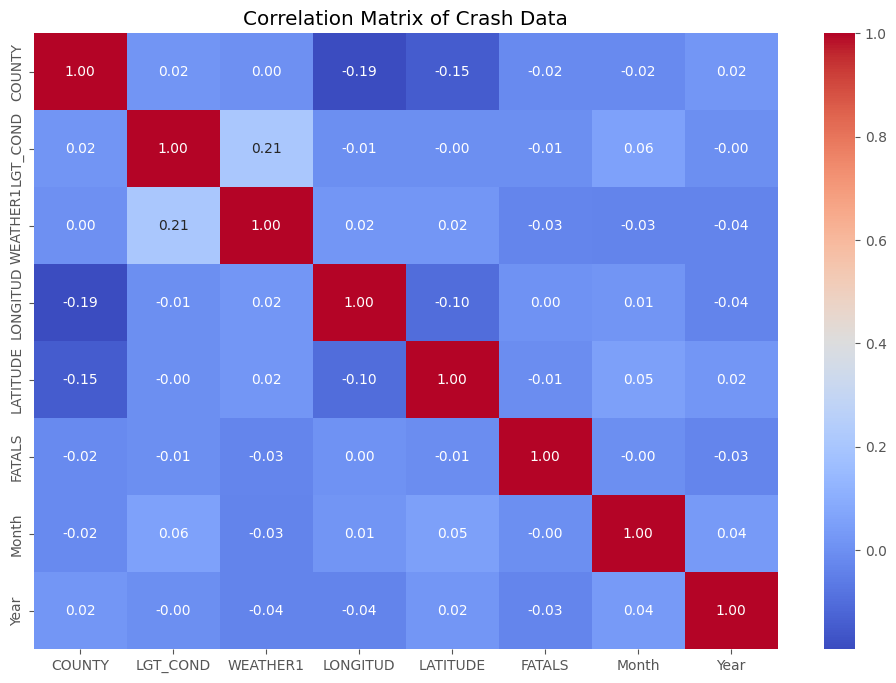

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the crash data
crash_data = pd.read_csv('/content/updated_data_1.csv')

# Select the relevant columns
crash_data = crash_data[['COUNTY', 'LGT_COND', 'WEATHER1', 'MonthYear', 'LONGITUD', 'LATITUDE', 'FATALS']]

# Convert 'MonthYear' to datetime objects
crash_data['MonthYear'] = pd.to_datetime(crash_data['MonthYear'])
# Extract numerical representation (e.g., year, month)
crash_data['Month'] = crash_data['MonthYear'].dt.month
crash_data['Year'] = crash_data['MonthYear'].dt.year

# Drop the original 'MonthYear' column if needed
crash_data = crash_data.drop('MonthYear', axis=1)


# Calculate the correlation matrix
correlation_matrix = crash_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Crash Data')
plt.show()

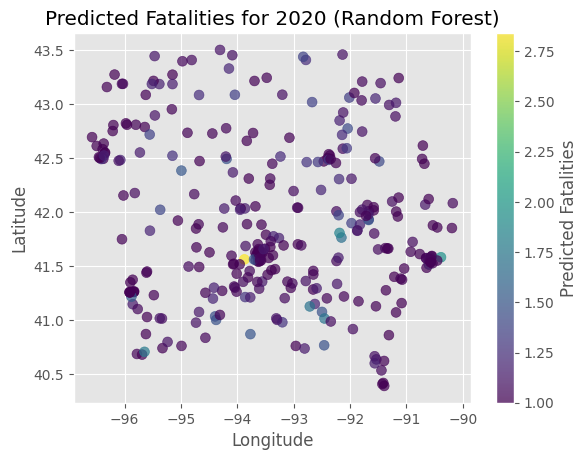

In [ ]:
# prompt: based on 2016 to 2019 as training data, predict how 'LONGITUD', 'LATITUDE' infulence 'FATALS' in 2020 using random forest method

# Load the crash data
crash_data = pd.read_csv('/content/updated_data_1.csv')

# Select the relevant columns and filter data for training (2016-2019)
crash_data_train = crash_data[['LATITUDE', 'LONGITUD', 'YEAR', 'FATALS']]
crash_data_train = crash_data_train[(crash_data_train['YEAR'] >= 2016) & (crash_data_train['YEAR'] <= 2019)]

# Select the relevant columns and filter data for prediction (2020)
crash_data_2020 = crash_data[['LATITUDE', 'LONGITUD', 'YEAR', 'FATALS']]
crash_data_2020 = crash_data_2020[crash_data_2020['YEAR'] == 2020]


# Prepare data for Random Forest
X_train = crash_data_train[['LATITUDE', 'LONGITUD']]
y_train = crash_data_train['FATALS']

X_test = crash_data_2020[['LATITUDE', 'LONGITUD']]
y_test = crash_data_2020['FATALS']

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict fatalities for 2020
predictions_2020 = model.predict(X_test)

# Evaluate the model (optional)
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, predictions_2020)
# print(f"Mean Squared Error: {mse}")

# Plot predicted fatalities for 2020
plt.scatter(crash_data_2020['LONGITUD'], crash_data_2020['LATITUDE'],
            c=predictions_2020, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Fatalities for 2020 (Random Forest)')
plt.colorbar(label='Predicted Fatalities')
plt.show()

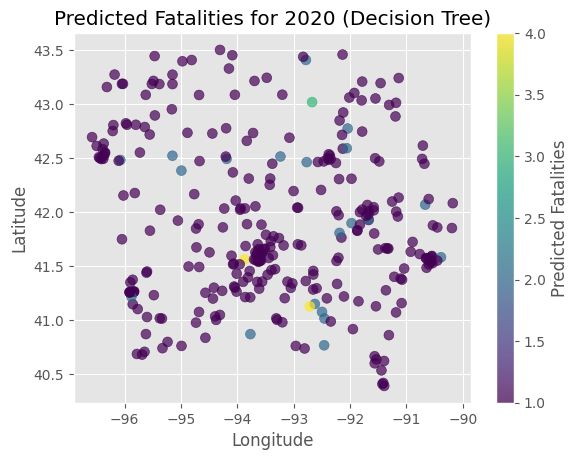

In [ ]:
# prompt: based on 2016 to 2019 as training data, predict how 'LONGITUD', 'LATITUDE' infulence 'FATALS' in 2020 using DECISION TREE method

# Load the crash data
crash_data = pd.read_csv('/content/updated_data_1.csv')

# Select the relevant columns and filter data for training (2016-2019)
crash_data_train = crash_data[['LATITUDE', 'LONGITUD', 'YEAR', 'FATALS']]
crash_data_train = crash_data_train[(crash_data_train['YEAR'] >= 2016) & (crash_data_train['YEAR'] <= 2019)]

# Select the relevant columns and filter data for prediction (2020)
crash_data_2020 = crash_data[['LATITUDE', 'LONGITUD', 'YEAR', 'FATALS']]
crash_data_2020 = crash_data_2020[crash_data_2020['YEAR'] == 2020]

# Prepare data for Decision Tree
X_train = crash_data_train[['LATITUDE', 'LONGITUD']]
y_train = crash_data_train['FATALS']

X_test = crash_data_2020[['LATITUDE', 'LONGITUD']]
y_test = crash_data_2020['FATALS']

from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict fatalities for 2020
predictions_2020 = model.predict(X_test)

# Plot predicted fatalities for 2020
plt.scatter(crash_data_2020['LONGITUD'], crash_data_2020['LATITUDE'],
            c=predictions_2020, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Fatalities for 2020 (Decision Tree)')
plt.colorbar(label='Predicted Fatalities')
plt.show()

<ipython-input-26-a09e242ae13c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['MonthYear'] = pd.to_datetime(crash_data['MonthYear'])
<ipython-input-26-a09e242ae13c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data['Month'] = crash_data['MonthYear'].dt.month
<ipython-input-26-a09e242ae13c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

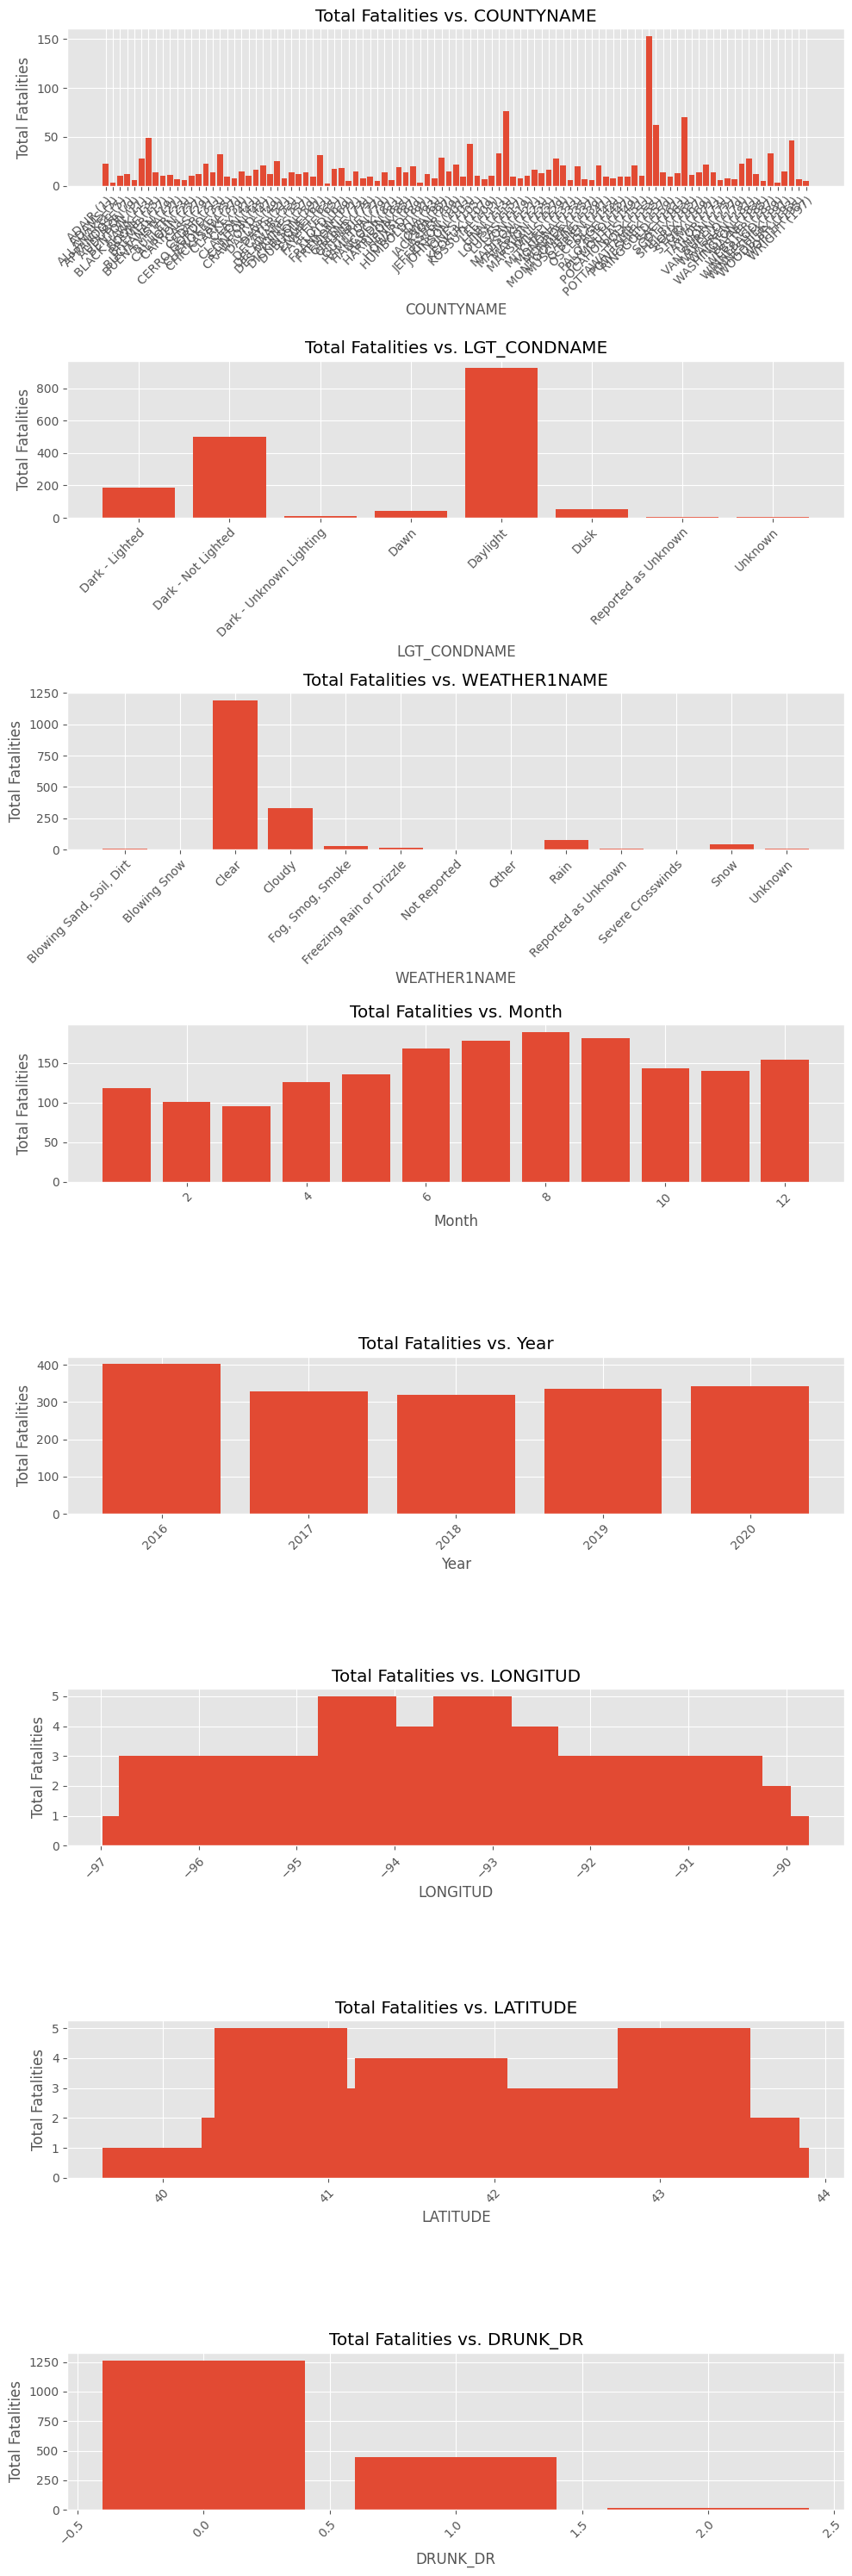

In [ ]:
# prompt: plot bar graph show how 'COUNTYNAME', 'LGT_CONDNAME', 'WEATHER1NAME', 'MonthYear', 'LONGITUD', 'LATITUDE', 'DRUNK_DR. infulence 'FATALS'

# Load the crash data
crash_data = pd.read_csv('/content/updated_data_1.csv')

# Select the relevant columns
crash_data = crash_data[['COUNTYNAME', 'LGT_CONDNAME', 'WEATHER1NAME', 'MonthYear', 'LONGITUD', 'LATITUDE', 'DRUNK_DR', 'FATALS']]

# Convert 'MonthYear' to datetime objects
crash_data['MonthYear'] = pd.to_datetime(crash_data['MonthYear'])
# Extract numerical representation (e.g., year, month)
crash_data['Month'] = crash_data['MonthYear'].dt.month
crash_data['Year'] = crash_data['MonthYear'].dt.year

# Drop the original 'MonthYear' column if needed
crash_data = crash_data.drop('MonthYear', axis=1)

# Create a list of the features to plot
features = ['COUNTYNAME', 'LGT_CONDNAME', 'WEATHER1NAME', 'Month', 'Year', 'LONGITUD', 'LATITUDE', 'DRUNK_DR']

# Create a figure and axes
fig, axs = plt.subplots(len(features), 1, figsize=(10, 30))

# Loop through the features
for i, feature in enumerate(features):
    # Group data by the feature and sum the fatalities
    feature_fatals = crash_data.groupby(feature)['FATALS'].sum()

    # Create a bar graph of the feature vs. fatalities
    axs[i].bar(feature_fatals.index, feature_fatals.values)
    axs[i].set_title(f'Total Fatalities vs. {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Total Fatalities')
    # Rotate x-axis labels for better readability (optional)
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()